# Video Analysis

In [4]:
import pytube

# VS Code for the Web: vscode.dev (livestream Oct 21)
# url = "https://www.youtube.com/watch?v=sy3TUb_iVJM"

# Shorter VSCode video
url = 'https://www.youtube.com/watch?v=S320N3sxinE'

In [5]:
youtube = pytube.YouTube(url)
streams = youtube.streams
mp4 = streams.filter(file_extension='mp4').order_by('resolution')
len(mp4)

8

In [6]:
[s.resolution for s in mp4]

['144p', '240p', '360p', '360p', '480p', '720p', '720p', '1080p']

In [7]:
[s.resolution + " (" + str(round(s.filesize/2**10/2**10)) + " MB)" for s in mp4]

['144p (2 MB)',
 '240p (4 MB)',
 '360p (7 MB)',
 '360p (3 MB)',
 '480p (6 MB)',
 '720p (15 MB)',
 '720p (14 MB)',
 '1080p (24 MB)']

In [8]:
s = streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first()
s

<Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">

In [9]:
s.resolution

'720p'

In [10]:
s.filesize
# translate to kB
s.filesize/2**10
# translate to MB
s.filesize/2**10/2**10

15.315690040588379

The legacy streams that contain the audio and video in a single file (referred to as “progressive download”) are still available, but only for resolutions 720p and below.

progressive streams have the video and audio in a single file, but typically do not provide the highest quality media; meanwhile, adaptive streams split the video and audio tracks but can provide much higher quality.

In [11]:
s.is_progressive

True

In [12]:
s.download('downloads')

'c:\\Users\\ydebray\\Downloads\\video-analyzer\\downloads\\Get started with Visual Studio Code.mp4'

## Select video sequence 

In [13]:
import os
dl = os.listdir("downloads")
dl

['Get started with Visual Studio Code.mp4',
 'streamlit-streamlit_app-2021-11-24-13-11-74.mp4',
 'streamlit-streamlit_app-2021-11-24-13-11-74.webm']

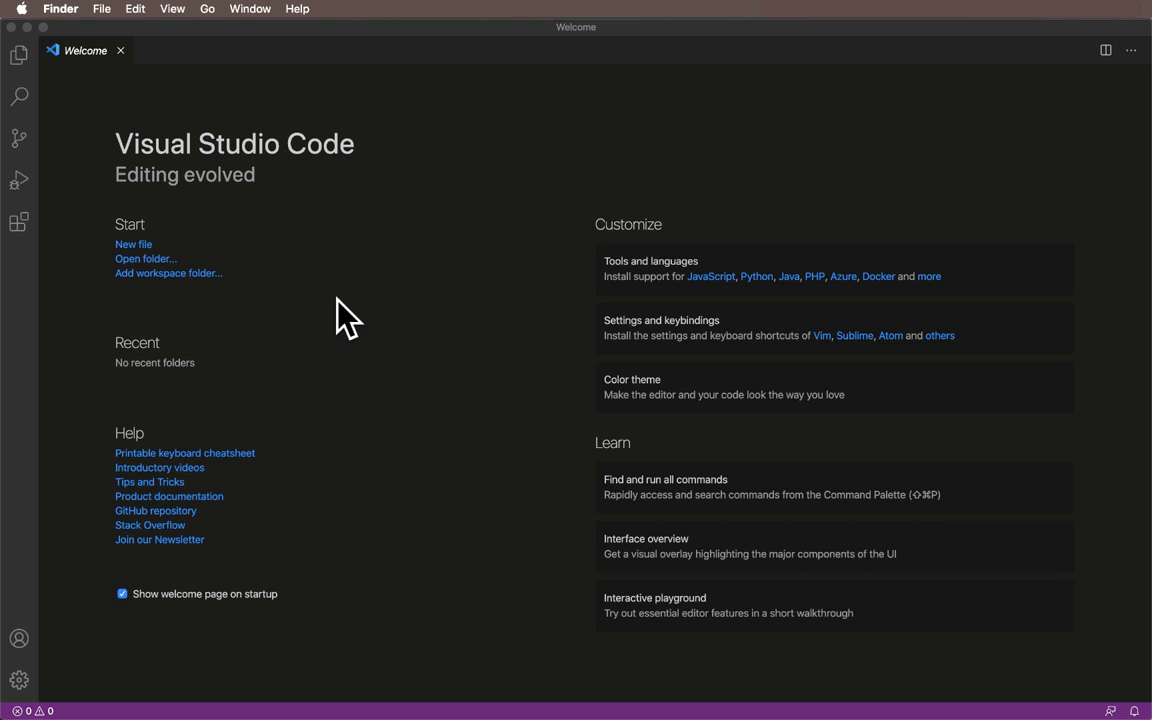

In [14]:
from moviepy.editor import VideoFileClip
# import matplotlib.pyplot as plt
from PIL import Image
t = 42
myclip = VideoFileClip("downloads/"+dl[0])
f = myclip.get_frame(t)
# plt.imshow(f)
img = Image.fromarray(f)
img

In [71]:
Image.fromarray(f).save("downloads/frame42.jpg")

In [74]:
# f.tobytes()

### Manipulate video duration format

https://realpython.com/python-time-module/

In [ ]:
d=int(myclip.duration)

In [63]:
from datetime import timedelta
timedelta(seconds=d)

datetime.timedelta(seconds=303)

In [67]:
from datetime import time

time()

datetime.time(0, 0)

In [47]:
minutes, seconds = divmod(d, 60)
print("%02d:%02d" % (minutes,seconds))


05:03


In [70]:
type(minutes)

int

In [68]:
time(minute=minutes,second=seconds)

datetime.time(0, 5, 3)

In [46]:
def format_time(d):
    minutes, seconds = divmod(d, 60)
    return "%02d:%02d" % (minutes,seconds)

In [48]:
format_time(d)

'05:03'

## Optical Character Recognition (OCR with pytesseract)

https://pypi.org/project/pytesseract/

https://nanonets.com/blog/ocr-with-tesseract/

In [15]:
# Make sure that tesseract is in the PATH
import os
# os.environ.get('PATH')

In [16]:
!tesseract --version

tesseract v4.0.0.20190314
 leptonica-1.78.0
  libgif 5.1.4 : libjpeg 8d (libjpeg-turbo 1.5.3) : libpng 1.6.34 : libtiff 4.0.9 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.2.0
 Found AVX2
 Found AVX
 Found SSE


In [21]:
import pytesseract
txt = pytesseract.image_to_string(img)
txt

'2\n\nad\n\n \n\nVisual Studio Code\n\nEditing evolved\n\nce\nery\nas\n\nead\nNet ry\n\na\n\ni a lla\n\n \n\nFe oly.)\n\nScere\nPe ee te eee Lid\n\nCeo\nInstall the settings and keyboard shortcuts of Vim, Sublime, Atom and others\n\nCoed\nDee et pod\n\nLearn\n\nCea\nRapidly access and search commands from the Command Palette (038P)\n\nInterface overview\nSe eT Lu eect)\n\nCeO\nSteer nrg)\n\x0c'

In [23]:
from IPython.core.display import HTML
HTML(txt)

In [22]:
with open("downloads/ocr.txt","w") as f:
    f.write(txt)